In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils
from utils import display

In [2]:
# 연동이 되었는지 확인
import os
os.listdir("./Data")

['Ace',
 'Akainu',
 'Brook',
 'Chopper',
 'Crocodile',
 'Franky',
 'Jinbei',
 'Kurohige',
 'Law',
 'Luffy',
 'Mihawk',
 'Nami',
 'Rayleigh',
 'Robin',
 'Sanji',
 'Shanks',
 'Usopp',
 'Zoro']

In [3]:
# 데이터셋 불러오기
from tensorflow.keras.utils import image_dataset_from_directory

dataset = image_dataset_from_directory(
    directory = os.path.join('Data'),
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=100,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear'
)

Found 11737 files belonging to 18 classes.
Using 9390 files for training.


In [4]:
# 검증 데이터셋
val_dataset = image_dataset_from_directory(
    directory = os.path.join('Data'),
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=1,
    image_size=(64,64),
    shuffle=True,
    seed=100,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear'
)

Found 11737 files belonging to 18 classes.
Using 2347 files for validation.


['Ace', 'Akainu', 'Brook', 'Chopper', 'Crocodile', 'Franky', 'Jinbei', 'Kurohige', 'Law', 'Luffy', 'Mihawk', 'Nami', 'Rayleigh', 'Robin', 'Sanji', 'Shanks', 'Usopp', 'Zoro']
(32, 64, 64, 3) (32, 18)
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

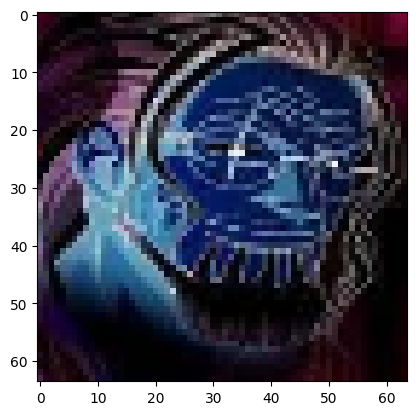

In [5]:
from matplotlib import pyplot as plt

# 클래스명 확인
print(dataset.class_names)
# 샘플 가져와보기
for data, label in dataset.take(1):
  print(data.shape, label.shape)
  print(label)
  plt.imshow(data[0].numpy().astype(np.uint8))

In [6]:
NUM_CLASSES = 18

## 2. 모델 구축

In [7]:
input_layer = layers.Input((64, 64, 3))

x = layers.Flatten()(input_layer)
x = layers.Dense(400, activation="relu")(x)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 400)               1229200   
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 18)                2718      
Total params: 1,342,268
Trainable params: 1,342,268
Non-trainable params: 0
___________________________________________________

In [8]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [9]:
model.fit(dataset, validation_data=val_dataset, epochs=30, shuffle=True)

Epoch 1/30


ValueError: in user code:

    C:\Users\1\anaconda3\envs\ecg\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\1\anaconda3\envs\ecg\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\1\anaconda3\envs\ecg\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\1\anaconda3\envs\ecg\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\1\anaconda3\envs\ecg\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\1\anaconda3\envs\ecg\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\1\anaconda3\envs\ecg\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\1\anaconda3\envs\ecg\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\1\anaconda3\envs\ecg\lib\site-packages\keras\engine\input_spec.py:269 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer model: expected shape=(None, 32, 32, 3), found shape=(None, 64, 64, 3)
